In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
# normalizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# normalizing string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
from sklearn.model_selection import train_test_split

seed = 22
df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=seed)

y_train = df_train.defects.values
y_valid = df_valid.defects.values
y_test = df_test.defects.values

df_train.drop(columns=['defects'], inplace=True)
df_valid.drop(columns=['defects'], inplace=True)
df_test.drop(columns=['defects'], inplace=True)

In [5]:
def prepare_input(df: pd.DataFrame):
    copy = df.copy()
    copy.drop(columns=['id'], inplace=True)
    return copy.values

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from typing import Callable

In [19]:
def perform_logistic_regression_and_calc_metrics(prepare_input: Callable):
    x_train = prepare_input(df_train)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    x_valid = prepare_input(df_valid)
    y_predict = model.predict(x_valid)
    y_prob = model.predict_proba(x_valid)[:,1]
    
    print('accuracy:', round(accuracy_score(y_predict, y_valid), 3))
    print('Precision:', round(precision_score(y_predict, y_valid), 3))
    print('recall:', round(recall_score(y_predict, y_valid), 3))
    print('AUC:', round(roc_auc_score(y_valid, y_prob), 3))
    fpr, tpr, thresholds = roc_curve(y_valid, y_prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

In [14]:
def base_line_model_predict(x):
    return np.full(len(x), False, dtype=bool)

x_valid = prepare_input(df_valid)
y_predict = base_line_model_predict(x_valid)
print(round(accuracy_score(y_predict, y_valid), 3))

0.77


In [ ]:
from sklearn.base import BaseEstimator
class DummyModel(BaseEstimator):
    def fit(self):
        pass

our logistic regression model is only 1% better :) so we should make it much better

accuracy: 0.784
Precision: 0.294
recall: 0.557
AUC: 0.63


/Users/shayan/miniconda3/envs/ML-zoomcamp-playground/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


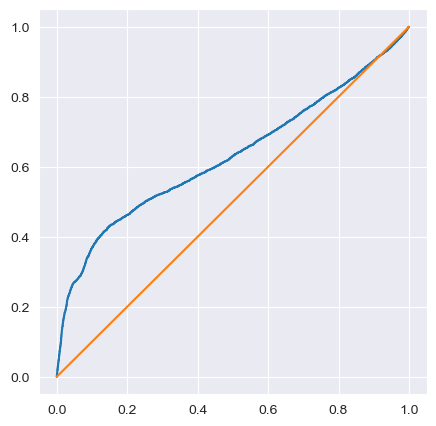

In [12]:
perform_logistic_regression_and_calc_metrics(prepare_input)

In [17]:
def halstead_prepare_input(df: pd.DataFrame):
    copy = df.copy()
    copy.drop(columns=['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)'], inplace=True)
    return copy.values

accuracy: 0.783
Precision: 0.302
recall: 0.55
AUC: 0.651


/Users/shayan/miniconda3/envs/ML-zoomcamp-playground/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


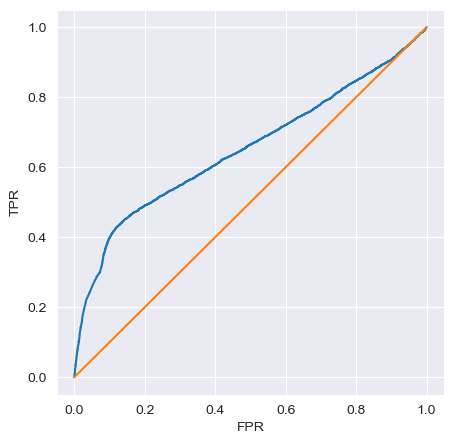

In [20]:
perform_logistic_regression_and_calc_metrics(halstead_prepare_input)